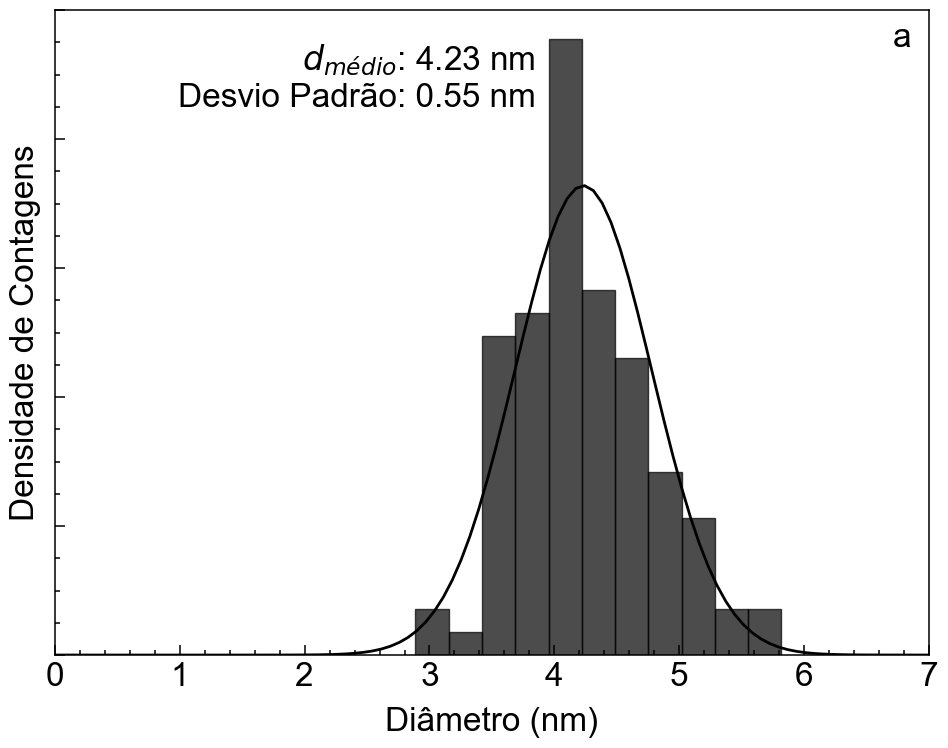

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from matplotlib.ticker import AutoMinorLocator
import os

# Update rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 24
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['#000000', '#0000FE', '#FE0000', '#008001', '#FD8000', '#8c564b', 
                                    "#33222e", "#b42727", '#bcbd22', '#17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize": (10, 8),
                 "figure.subplot.left": 0.177, "figure.subplot.right": 0.946,
                 "figure.subplot.bottom": 0.156, "figure.subplot.top": 0.965,
                 "axes.autolimit_mode": "round_numbers",
                 "xtick.major.size": 7,
                 "xtick.minor.size": 3.5,
                 "xtick.major.width": 1.1,
                 "xtick.minor.width": 1.1,
                 "xtick.major.pad": 5,
                 "xtick.minor.visible": True,
                 "ytick.major.size": 7,
                 "ytick.minor.size": 3.5,
                 "ytick.major.width": 1.1,
                 "ytick.minor.width": 1.1,
                 "ytick.major.pad": 5,
                 "ytick.minor.visible": True,
                 "lines.markersize": 10,
                 "lines.markerfacecolor": "none",
                 "lines.markeredgewidth": 0.8})

# Replace 'your_file.csv' with the path to your actual CSV file
csv_file = "/home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/Distribuição de tamanhos/B-Fe3O4-E-H-ODE S1 rep2"

# Read the CSV file with comma as the decimal character
df = pd.read_csv(csv_file, header=None, sep='.', decimal=',')

# Extract the first column
first_column = df.iloc[:, 0]

# Calculate mean and standard deviation
mean_val = first_column.mean()
std_val = first_column.std()

# Plot the histogram
count, bins, ignored = plt.hist(first_column, bins=11, density=True, edgecolor='k', alpha=0.7)

# Plot the Gaussian curve
x = np.linspace(0, 7, 100)
p = norm.pdf(x, mean_val, std_val)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Diâmetro (nm)')
plt.ylabel('Densidade de Contagens')
plt.xlim(0, 7)

# Customize the y-axis to hide numbers and put ticks inside
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in')

# Add dmédio and standard deviation text to the plot
plt.text(0.55, 0.95, f'$d_{{médio}}$: {mean_val:.2f} nm\nDesvio Padrão: {std_val:.2f} nm', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.text(0.98, 0.98, 'a', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.savefig('/home/ABTLUS/victor.secco/data_processing/Imagens/B-Fe3O4-E-H-ODE S1 rep2.png', dpi=300)
# Show plot
plt.show()


In [55]:
from PIL import Image
import numpy as np
import os

def convert_to_uint8(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Convert the array to uint8
    image_array_uint8 = image_array.astype(np.uint8)
    
    # Convert back to image
    image_uint8 = Image.fromarray(image_array_uint8)
    
    return image_uint8

def convert_tif_to_png(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Iterate through files in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.png')
            
            # Convert to uint8
            image_uint8 = convert_to_uint8(input_path)
            
            # Save as PNG
            image_uint8.save(output_path, format='PNG')
            print(f"Converted {input_path} to {output_path}")

# Usage example
input_folder = '/home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3'
output_folder = '/home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3'

convert_tif_to_png(input_folder, output_folder)


Converted /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S1-Reprod3-HRTEM_0007.tif to /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S1-Reprod3-HRTEM_0007.png
Converted /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S1-Reprod3-HRTEM_0005.tif to /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S1-Reprod3-HRTEM_0005.png
Converted /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S2_0010.tif to /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S2_0010.png
Converted /home/ABTLUS/victor.secco/data_processing/TEM_data/Fe3O4/TEM Images/B-Fe3O4-E-H-ODE S1 rep3/B-Fe3O4-E-H-ODE-S2_0003.tif to /home/ABTLUS/victor.secco/data_processing/TEM_data/F

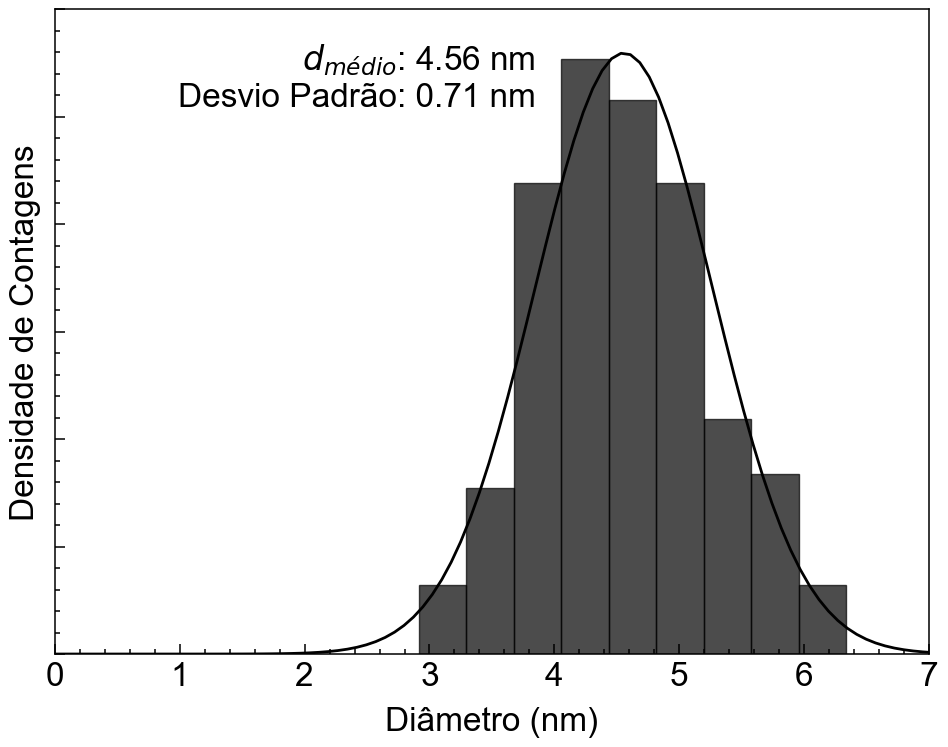

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Read the CSV file with comma as the decimal character
csv_file = "/home/ABTLUS/victor.secco/data_processing/TEM_data/CdSe_PCA/CdSe_P1/contagem.txt"
df = pd.read_csv(csv_file, header=0, sep='\t', decimal='.')
df.drop(columns=[" "], inplace=True)
first_column = df.iloc[:, -1]

mean_val = first_column.mean()
std_val = first_column.std()

# Plot the histogram
count, bins, ignored = plt.hist(first_column, bins=12, density=True, edgecolor='k', alpha=0.7)

# Plot the Gaussian curve
x = np.linspace(0, max(bins), 100)
p = norm.pdf(x, mean_val, std_val)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Diâmetro (nm)')
plt.ylabel('Densidade de Contagens')
plt.xlim(0, 7)

# Customize the y-axis to hide numbers and put ticks inside
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in')

# Add mean and standard deviation text to the plot
plt.text(0.55, 0.95, f'$d_{{médio}}$: {mean_val:.2f} nm\nDesvio Padrão: {std_val:.2f} nm', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()

plt.savefig('/home/ABTLUS/victor.secco/data_processing/Imagens/CdSe_P5_contagem.png', dpi=300)
plt.show()


0      4.057
1      5.306
2      5.551
3      4.321
4      5.424
       ...  
185    5.652
186    5.967
187    7.544
188    5.234
189    5.234
Name: Length, Length: 190, dtype: float64